In [3]:
import pandas as pd

# Load the Excel file
file_path = "data/DataAnalyst_Assesment_Dataset.xlsx"
xls = pd.ExcelFile(file_path)

xls.sheet_names


['Large_Fake_Bookings_With_Discre']

In [5]:
# Load the dataset
df = pd.read_excel(xls, sheet_name="Large_Fake_Bookings_With_Discre")

In [6]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

In [7]:
#Display the first 5 rows of the DataFrame
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [8]:
# Drop the irrelevant 'Subscription Type' column
df_cleaned = df.drop(columns=['Subscription Type'])

# Standardizing text columns: Stripping spaces and converting to lowercase
text_columns = ['Booking Type', 'Status', 'Service Type', 'Facility', 'Theme']
df_cleaned[text_columns] = df_cleaned[text_columns].apply(lambda x: x.str.strip().str.lower())

In [9]:
# Check for unique values in categorical columns to spot inconsistencies
unique_values = {col: df_cleaned[col].unique() for col in text_columns}
unique_values

{'Booking Type': array(['facility', 'birthday party', 'class'], dtype=object),
 'Status': array(['pending', 'confirmed'], dtype=object),
 'Service Type': array(['facility', 'birthday party', 'class'], dtype=object),
 'Facility': array(['party room', 'play area', nan], dtype=object),
 'Theme': array([nan, 'superhero', 'sports', 'princess'], dtype=object)}

In [11]:
# Check for missing values count
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type         672
Instructor         730
Time Slot          205
Duration (mins)    205
Price                0
Facility           328
Theme              727
Service Name         0
Service Type         0
Customer Email      94
Customer Phone     105
dtype: int64


In [12]:
# Summary statistics for numerical fields
numerical_summary = df_cleaned[['Duration (mins)', 'Price']].describe()

print(numerical_summary)

       Duration (mins)        Price
count       795.000000  1000.000000
mean         84.415094   139.477210
std          30.383838    92.239835
min          45.000000     0.000000
25%          45.000000    58.090000
50%          90.000000   137.355000
75%         120.000000   219.897500
max         120.000000   299.760000


In [13]:
# Check bookings where Duration (mins) is missing
missing_duration = df_cleaned[df_cleaned['Duration (mins)'].isnull()]['Booking Type'].value_counts()

print("Missing Duration (mins):", missing_duration)
# Check bookings where Price is zero
zero_price_bookings = df_cleaned[df_cleaned['Price'] == 0]

print("Zero Price Bookings:", zero_price_bookings)


Missing Duration (mins): Booking Type
birthday party    75
class             66
facility          64
Name: count, dtype: int64
Zero Price Bookings:                                Booking ID  \
8    d10de4ee-1592-438c-9897-b66f9e236eea   
16   9bdfab08-b764-4f66-b295-e61de9f134af   
17   c34016f8-4a55-4b01-b3d0-90799d6f1fbb   
19   998c97de-af1b-439d-bed9-8f4a4059e006   
30   fdfd580d-ec70-43fe-a3a6-77848410f5e6   
..                                    ...   
960  74857cc4-4e61-492d-a0ef-c35d96f1f807   
965  f2b0d7ca-1b63-42f4-ba5f-c2360245299e   
972  32c39c9b-2769-40c0-8c77-fd029f8dcbe2   
973  7b6ac619-21a0-45d4-9fce-e3a1eb31ae37   
993  73d48a88-6115-4fed-9b4e-a42a9d392713   

                              Customer ID Customer Name    Booking Type  \
8    4dc3f687-1a32-4b36-b5ba-628b1b7bbc75    Customer 9  birthday party   
16   41e8c079-1e43-467a-87dc-ff6b9330695c   Customer 17           class   
17   90c40046-fa6c-4b7b-9d68-301e17a7faad   Customer 18        facility   
19   e6a154

In [14]:
# Calculate median duration per booking type (ignoring NaNs)
median_durations = df_cleaned.groupby('Booking Type')['Duration (mins)'].median()

# Fill missing durations based on median per booking type
df_cleaned['Duration (mins)'] = df_cleaned.apply(
    lambda row: median_durations[row['Booking Type']] if pd.isnull(row['Duration (mins)']) else row['Duration (mins)'], 
    axis=1
)

# Verify if missing durations are filled
df_cleaned['Duration (mins)'].isnull().sum()


np.int64(0)

In [15]:
# Check if zero-price bookings have any indication of discounts or promotions
zero_price_summary = df_cleaned[df_cleaned['Price'] == 0].groupby('Booking Type').size()
zero_price_summary


Booking Type
birthday party    40
class             38
facility          37
dtype: int64

In [16]:
# Check if zero-price bookings are associated with specific instructors, facilities, or customers
zero_price_details = df_cleaned[df_cleaned['Price'] == 0][['Instructor', 'Facility', 'Customer ID']].dropna().value_counts()

zero_price_details.head(10)  # Show top patterns if any exist


Series([], Name: count, dtype: int64)

In [18]:
# Add a flag column for zero-price bookings
df_cleaned['Zero Price Flag'] = df_cleaned['Price'] == 0

# Save the cleaned dataset for further analysis
cleaned_file_path = "data/Cleaned_Bookings_Dataset.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)

cleaned_file_path


'data/Cleaned_Bookings_Dataset.xlsx'

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_excel("data/Cleaned_Bookings_Dataset.xlsx")

# Set Seaborn style
sns.set(style="whitegrid")

C:\Users\comme\AppData\Local\Temp\ipykernel_19448\2587939313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Booking Type', palette='coolwarm')


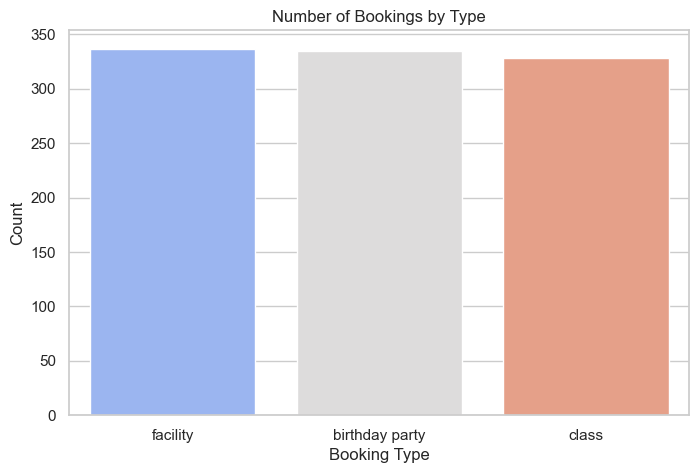

In [21]:
# Booking Distribution by Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Booking Type', palette='coolwarm')
plt.title('Number of Bookings by Type')
plt.xlabel('Booking Type')
plt.ylabel('Count')
plt.show()

C:\Users\comme\AppData\Local\Temp\ipykernel_19448\2939304519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Booking Type', y='Price', palette='coolwarm')


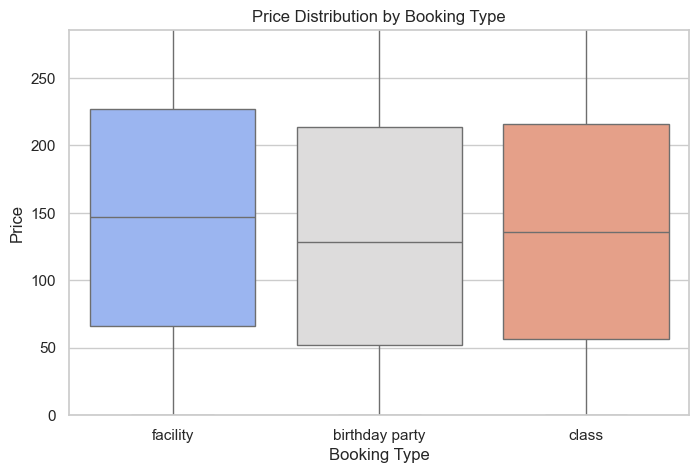

In [22]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Booking Type', y='Price', palette='coolwarm')
plt.title('Price Distribution by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Price')
plt.ylim(0, df['Price'].quantile(0.95))  # Remove extreme outliers for better visualization
plt.show()

C:\Users\comme\AppData\Local\Temp\ipykernel_19448\3808718104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Booking Type', y='Duration (mins)', palette='coolwarm')


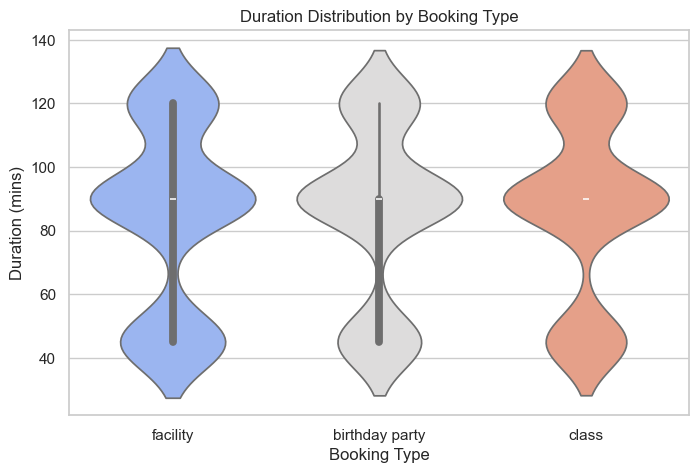

In [23]:
# Duration Distribution by Booking Type
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Booking Type', y='Duration (mins)', palette='coolwarm')
plt.title('Duration Distribution by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Duration (mins)')
plt.show()

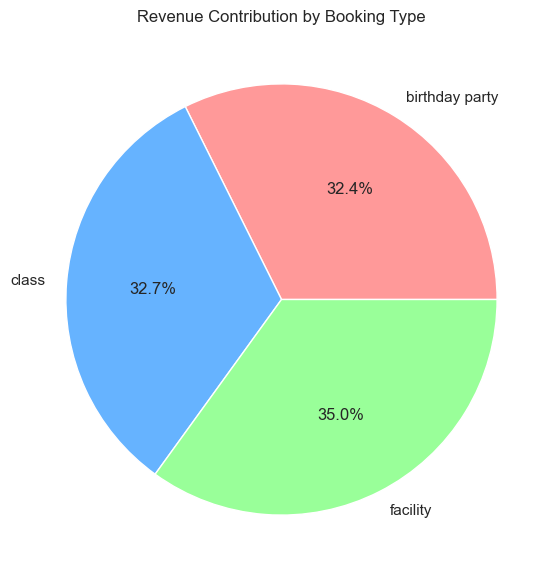

In [24]:
# Revenue Contribution by Booking Type
revenue = df.groupby('Booking Type')['Price'].sum()
plt.figure(figsize=(7, 7))
plt.pie(revenue, labels=revenue.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Revenue Contribution by Booking Type')
plt.show()

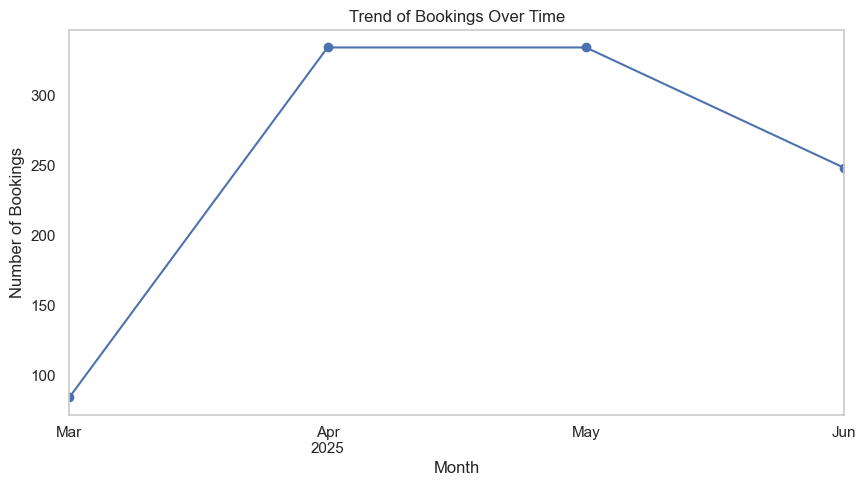

In [25]:
# Trend of Bookings Over Time
df['Booking Date'] = pd.to_datetime(df['Booking Date'])  # Ensure correct format
time_series = df.groupby(df['Booking Date'].dt.to_period('M')).size()
plt.figure(figsize=(10, 5))
time_series.plot(marker='o', color='b')
plt.title('Trend of Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()